Import packages

In [1]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

Import Cancer Dataset

In [2]:
cancer_data = pd.read_csv('cancer incidence by region.csv')

In [3]:
cancer_data.head()

,Region,Regional Health Area,Year,Case numbers,% Invasive ex. NMSC,Crude rate
0,Co Clare,Other RHA,1994,304,100.00%,327.69
1,Co Clare,Other RHA,1995,245,100.00%,262.67
2,Co Clare,Other RHA,1996,280,100.00%,297.85
3,Co Clare,Other RHA,1997,320,100.00%,339.45
4,Co Clare,Other RHA,1998,286,100.00%,299.59


Clean Cancer dataset

In [4]:
cancer_data.drop("% Invasive ex. NMSC", axis=1)

,Region,Regional Health Area,Year,Case numbers,Crude rate
0,Co Clare,Other RHA,1994,304,327.69
1,Co Clare,Other RHA,1995,245,262.67
2,Co Clare,Other RHA,1996,280,297.85
3,Co Clare,Other RHA,1997,320,339.45
4,Co Clare,Other RHA,1998,286,299.59
...,...,...,...,...,...
723,Co Wexford,Other RHA,2015,725,489.22
724,Co Wexford,Other RHA,2016,689,461.74
725,Co Wexford,Other RHA,2017,773,521.19
726,Co Wexford,Other RHA,2018,764,515.11


In [5]:
cancer_data = cancer_data[["Regional Health Area", "Region", "Year", "Case numbers", "Crude rate"]]

In [6]:
cancer_data.head()

,Regional Health Area,Region,Year,Case numbers,Crude rate
0,Other RHA,Co Clare,1994,304,327.69
1,Other RHA,Co Clare,1995,245,262.67
2,Other RHA,Co Clare,1996,280,297.85
3,Other RHA,Co Clare,1997,320,339.45
4,Other RHA,Co Clare,1998,286,299.59


In [7]:
cancer_data.sort_values(["Year", "Region"])


,Regional Health Area,Region,Year,Case numbers,Crude rate
78,Other RHA,Co Carlow,1994,132,319.24
52,RHA A,Co Cavan,1994,230,434.86
0,Other RHA,Co Clare,1994,304,327.69
26,Other RHA,Co Cork,1994,1497,359.43
104,Other RHA,Co Donegal,1994,493,381.47
...,...,...,...,...,...
649,Other RHA,Co Waterford,2019,666,582.33
675,Other RHA,Co Westmeath,2019,482,542.83
727,Other RHA,Co Wexford,2019,881,593.97
701,Other RHA,Co Wicklow,2019,818,572.29


In [8]:
cancer_data = cancer_data.rename(columns = {'Region' : 'COUNTY', 'Crude rate' : 'Cancer incidence rate'})
cancer_data['COUNTY'] = cancer_data['COUNTY'].str.replace('Co ','')
cancer_data.head()

,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate
0,Other RHA,Clare,1994,304,327.69
1,Other RHA,Clare,1995,245,262.67
2,Other RHA,Clare,1996,280,297.85
3,Other RHA,Clare,1997,320,339.45
4,Other RHA,Clare,1998,286,299.59


Filtering Cancer dataset to RHA A only

In [9]:
RHA_cancer_data = cancer_data["Regional Health Area"].isin(["RHA A"])
RHA_A = cancer_data[RHA_cancer_data]
RHA_A.head(20)

,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate
52,RHA A,Cavan,1994,230,434.86
53,RHA A,Cavan,1995,198,374.62
54,RHA A,Cavan,1996,211,398.53
55,RHA A,Cavan,1997,232,437.26
56,RHA A,Cavan,1998,222,415.84
57,RHA A,Cavan,1999,194,359.93
58,RHA A,Cavan,2000,205,375.40
59,RHA A,Cavan,2001,245,443.97
60,RHA A,Cavan,2002,252,445.65
61,RHA A,Cavan,2003,237,412.57


Filtering RHA A Cancer dataset to relevent years

In [10]:
RHA_A = RHA_A[RHA_A["Year"] >2005]
RHA_A.head()

,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate
64,RHA A,Cavan,2006,272,424.98
65,RHA A,Cavan,2007,269,406.94
66,RHA A,Cavan,2008,264,389.27
67,RHA A,Cavan,2009,290,417.84
68,RHA A,Cavan,2010,321,459.35


Creating an RHA total datasets

In [11]:
RHA_total = cancer_data.groupby(['Regional Health Area', 'Year']).sum('Case numbers').reset_index()
RHA_total.head()

,Regional Health Area,Year,Case numbers,Cancer incidence rate
0,Other RHA,1994,9895,7693.54
1,Other RHA,1995,9737,7582.02
2,Other RHA,1996,9985,7925.24
3,Other RHA,1997,10274,7947.63
4,Other RHA,1998,10303,7935.04


In [12]:
RHA_total = RHA_total[RHA_total["Year"] >2005]
RHA_total = RHA_total.drop("Cancer incidence rate", axis=1)
RHA_total.head(20)

,Regional Health Area,Year,Case numbers
12,Other RHA,2006,13286
13,Other RHA,2007,14225
14,Other RHA,2008,14940
15,Other RHA,2009,15553
16,Other RHA,2010,15858
17,Other RHA,2011,16600
18,Other RHA,2012,16514
19,Other RHA,2013,16830
20,Other RHA,2014,17244
21,Other RHA,2015,17580


Import deprivation dataset

In [13]:
deprivation_data = pd.read_csv('deprivation levels.csv', encoding='unicode_escape')
deprivation_data.head()

,ED_ID,GEOGDESC,COUNTY,Regional Health Area,Year,Population,Score
0,E01001,Carlow Urban,Carlow,Other RHA,2006,4605,3.42612
1,E01002,Graigue Urban,Carlow,Other RHA,2006,1524,3.18253
2,E01003,Clonmore,Carlow,Other RHA,2006,530,-0.43519
3,E01004,Hacketstown,Carlow,Other RHA,2006,1065,2.08920
4,E01005,Haroldstown,Carlow,Other RHA,2006,267,-1.26686


Extracting population dataframe by RHA

In [14]:
population = deprivation_data.groupby(['Regional Health Area', 'Year']).sum('Population').reset_index()
population = population.drop('Score', axis=1)
population.head()

,Regional Health Area,Year,Population
0,Other RHA,2006,3311229
1,Other RHA,2011,3566068
2,Other RHA,2016,3678970
3,RHA A,2006,928619
4,RHA A,2011,1022184


Cleaning the deprivation data

In [15]:
deprivation_data['COUNTY'] = deprivation_data['COUNTY'].str.replace('Dublin City','Dublin North')
deprivation_data['COUNTY'] = deprivation_data['COUNTY'].str.replace('Fingal','Dublin North')

Get weighted average of deprivation score

In [16]:
def weighted_average(deprivation_data, values, weights):
    return sum(deprivation_data[weights] * deprivation_data[values]) / deprivation_data[weights].sum()

Pulling out 3 datasets, 1. All counties both RHA, 2. Total RHA A, 3. Total Ireland 

In [17]:
dp_data = deprivation_data.groupby(['Regional Health Area','COUNTY', 'Year']).apply(weighted_average, 'Score', 'Population').to_frame(name = 'weighted_mean_dp').reset_index()
dp_data.head()

,Regional Health Area,COUNTY,Year,weighted_mean_dp
0,Other RHA,Carlow,2006,0.777419
1,Other RHA,Carlow,2011,0.962001
2,Other RHA,Carlow,2016,1.157709
3,Other RHA,Clare,2006,-0.068201
4,Other RHA,Clare,2011,-0.025837


In [18]:
RHA_dp_data = dp_data["Regional Health Area"].isin(["RHA A"])
RHA_A_dp = dp_data[RHA_dp_data]
RHA_A_dp.head(20)

,Regional Health Area,COUNTY,Year,weighted_mean_dp
87,RHA A,Cavan,2006,0.317616
88,RHA A,Cavan,2011,0.555036
89,RHA A,Cavan,2016,0.730796
90,RHA A,Dublin North,2006,1.215303
91,RHA A,Dublin North,2011,0.785628
92,RHA A,Dublin North,2016,0.789923
93,RHA A,Louth,2006,1.151057
94,RHA A,Louth,2011,1.151722
95,RHA A,Louth,2016,1.179671
96,RHA A,Meath,2006,-0.466371


In [19]:
dp_ireland = deprivation_data.groupby(['Year']).apply(weighted_average, 'Score', 'Population')
dp_ireland.head()

Year
2006    0.525671
2011    0.442238
2016    0.490269
dtype: float64

In [20]:
dp_ireland = {'Year' : ['2006', '2011', '2016'],
              'Weighted_mean_dp' : ['0.526', '0.442', '0.490']}
dp_ireland = pd.DataFrame(dp_ireland)
dp_ireland.head()

,Year,Weighted_mean_dp
0,2006,0.526
1,2011,0.442
2,2016,0.490


In [21]:
dp_RHA = deprivation_data.groupby(['Regional Health Area', 'Year']).apply(weighted_average, 'Score', 'Population').to_frame(name = 'weighted_mean_dp').reset_index()
dp_RHA.head()

,Regional Health Area,Year,weighted_mean_dp
0,Other RHA,2006,0.451345
1,Other RHA,2011,0.392826
2,Other RHA,2016,0.452691
3,RHA A,2006,0.790698
4,RHA A,2011,0.614618


Importing Age Standardised Cancer Death Rate

In [22]:
cancer_deaths = pd.read_csv('Age standardised death rate from Malignant neoplasms.csv')
cancer_deaths.head()

,Statistic Label,Year,Age Group,Sex,Cause of Death,Area,UNIT,Age Standardised Death rate
0,Standardised Death Rate,2006,All ages,Both sexes,Malignant neoplasms,All counties and regions,Rate,315.66
1,Standardised Death Rate,2006,All ages,Both sexes,Malignant neoplasms,Carlow,Rate,363.09
2,Standardised Death Rate,2006,All ages,Both sexes,Malignant neoplasms,Dublin City and County,Rate,329.63
3,Standardised Death Rate,2006,All ages,Both sexes,Malignant neoplasms,Kildare,Rate,312.60
4,Standardised Death Rate,2006,All ages,Both sexes,Malignant neoplasms,Kilkenny,Rate,279.41


Clean Data set to match merged data (Note Dublin only available for all county)

In [23]:
cancer_deaths = cancer_deaths.drop(["Statistic Label", "Age Group", "Sex", "Cause of Death", "UNIT"], axis=1)

In [24]:
cancer_deaths = cancer_deaths.rename(columns = {'Area' : 'COUNTY'})
cancer_deaths['COUNTY'] = cancer_deaths['COUNTY'].str.replace('Dublin City and County','Dublin North')
cancer_deaths['COUNTY'] = cancer_deaths['COUNTY'].str.replace('All counties and regions', 'Total Ireland')
cancer_deaths.head()

,Year,COUNTY,Age Standardised Death rate
0,2006,Total Ireland,315.66
1,2006,Carlow,363.09
2,2006,Dublin North,329.63
3,2006,Kildare,312.60
4,2006,Kilkenny,279.41


Merging the Cancer incidence and deprivation datasets for RHA A

In [25]:
RHA_dp_cancer = RHA_A.merge(RHA_A_dp, left_on=['Regional Health Area', 'COUNTY', 'Year'], right_on=['Regional Health Area','COUNTY', 'Year'], how = 'left')
RHA_dp_cancer.head(20)


,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate,weighted_mean_dp
0,RHA A,Cavan,2006,272,424.98,0.317616
1,RHA A,Cavan,2007,269,406.94,NaN
2,RHA A,Cavan,2008,264,389.27,NaN
3,RHA A,Cavan,2009,290,417.84,NaN
4,RHA A,Cavan,2010,321,459.35,NaN
5,RHA A,Cavan,2011,300,410.18,0.555036
6,RHA A,Cavan,2012,330,454.13,NaN
7,RHA A,Cavan,2013,345,475.65,NaN
8,RHA A,Cavan,2014,335,467.35,NaN
9,RHA A,Cavan,2015,352,499.21,NaN


Fill forward the data for years available in the Deprivation Dataset to the last available years data

In [26]:
RHA_dp_cancer = RHA_dp_cancer.fillna(method='ffill')

Merge death rate dataset to the merged dataset 

In [27]:
RHA_dp_deaths_cancer = RHA_dp_cancer.merge(cancer_deaths, left_on=['COUNTY', 'Year'], right_on=['COUNTY', 'Year'], how = 'inner')
RHA_dp_deaths_cancer.head(20)

,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate,weighted_mean_dp,Age Standardised Death rate
0,RHA A,Cavan,2006,272,424.98,0.317616,281.22
1,RHA A,Cavan,2007,269,406.94,0.317616,309.12
2,RHA A,Cavan,2008,264,389.27,0.317616,297.60
3,RHA A,Cavan,2009,290,417.84,0.317616,249.35
4,RHA A,Cavan,2010,321,459.35,0.317616,320.76
5,RHA A,Cavan,2011,300,410.18,0.555036,287.10
6,RHA A,Cavan,2012,330,454.13,0.555036,255.67
7,RHA A,Cavan,2013,345,475.65,0.555036,264.74
8,RHA A,Cavan,2014,335,467.35,0.555036,270.33
9,RHA A,Cavan,2015,352,499.21,0.555036,267.53


Visualisation of RHA A merged dataset

Text(0.5, 1.0, 'Cancer Incidence Rate per 100k population for Regional Health Area - A')

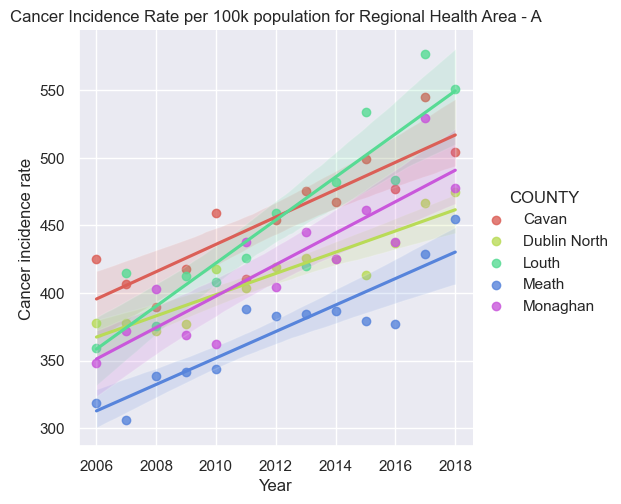

In [28]:
sns.lmplot(data=RHA_dp_deaths_cancer, x='Year', y='Cancer incidence rate', hue = 'COUNTY', palette='hls')
plt.title('Cancer Incidence Rate per 100k population for Regional Health Area - A')

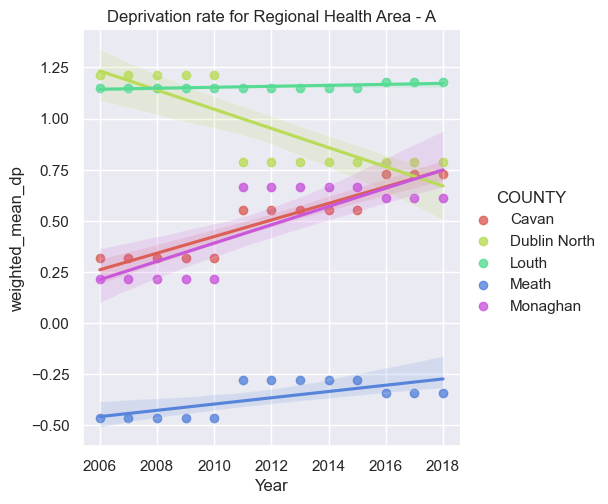

In [49]:
sns.lmplot(data=RHA_dp_deaths_cancer, x='Year', y='weighted_mean_dp', hue = 'COUNTY', palette='hls')
plt.title('Deprivation rate for Regional Health Area - A')
plt.show()

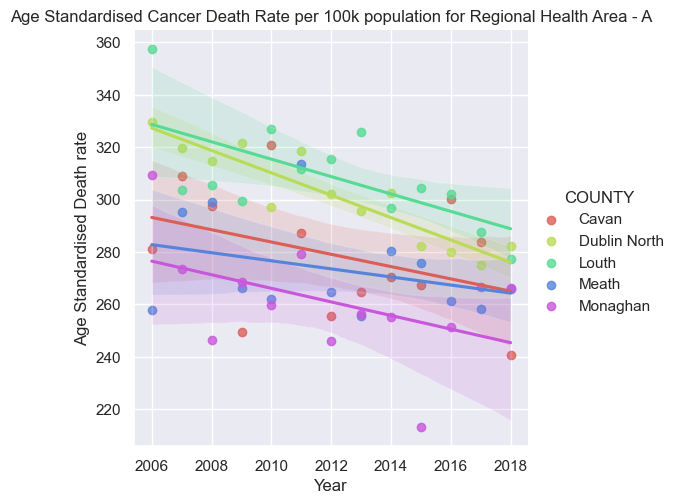

In [50]:
sns.lmplot(data=RHA_dp_deaths_cancer, x='Year', y='Age Standardised Death rate', hue = 'COUNTY', palette='hls')
plt.title('Age Standardised Cancer Death Rate per 100k population for Regional Health Area - A')
plt.show()

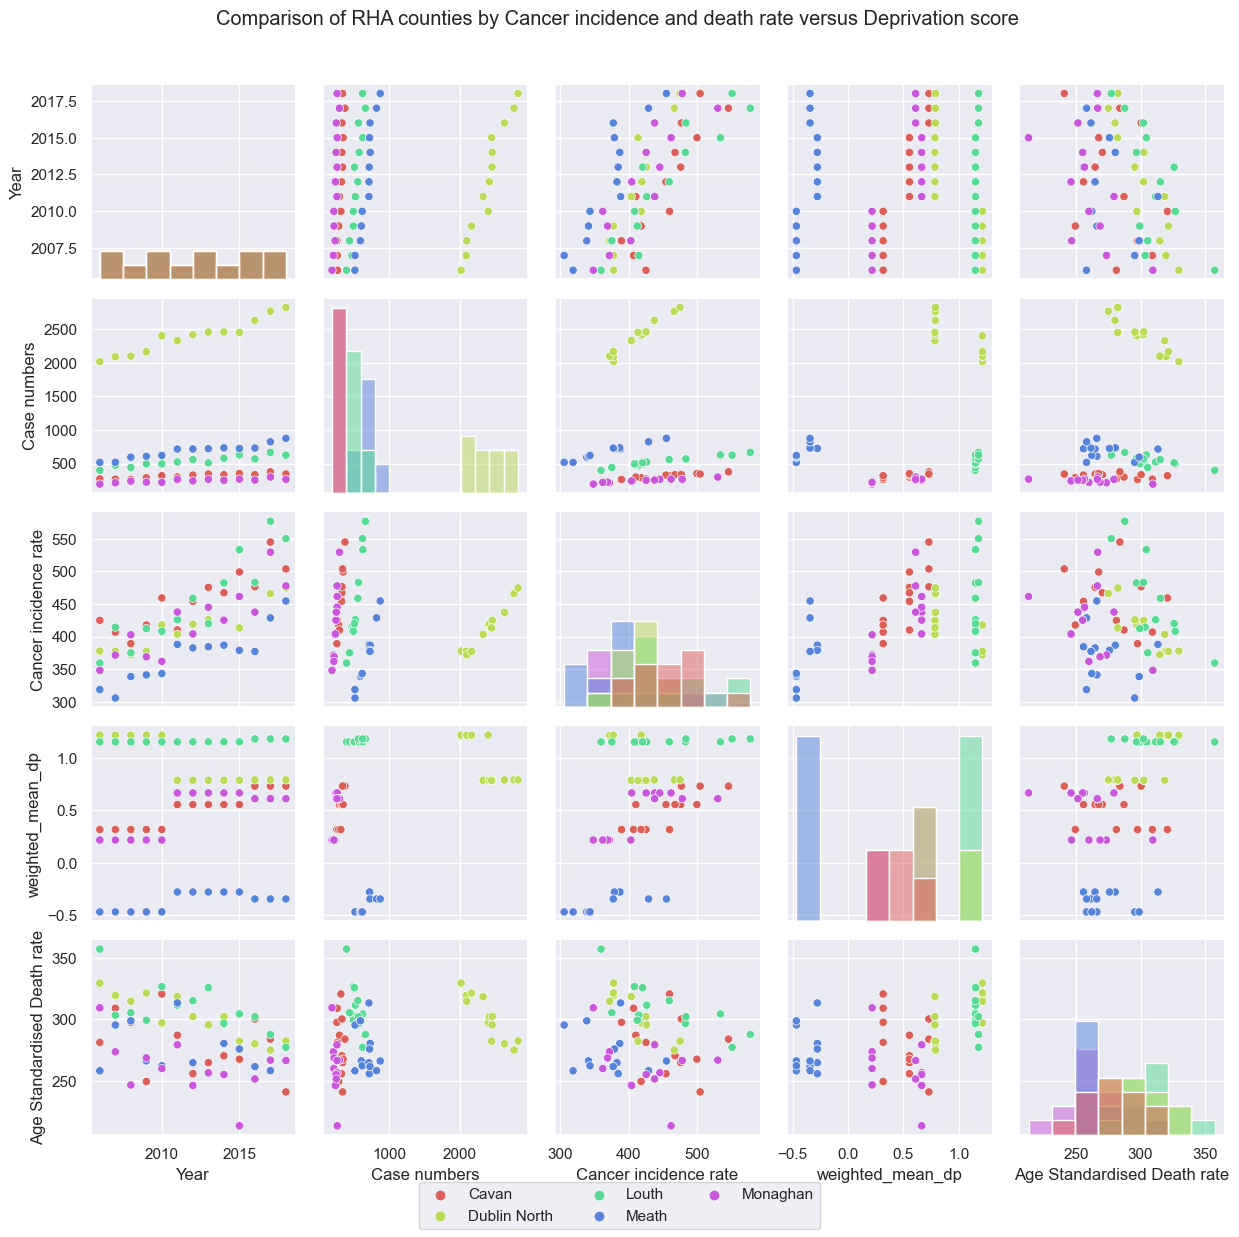

In [48]:
g = sns.PairGrid(RHA_dp_deaths_cancer, hue="COUNTY", palette='hls')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.fig.suptitle('Comparison of RHA counties by Cancer incidence and death rate versus Deprivation score')
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)
g.fig.subplots_adjust(top=0.92, bottom=0.08)
plt.show()

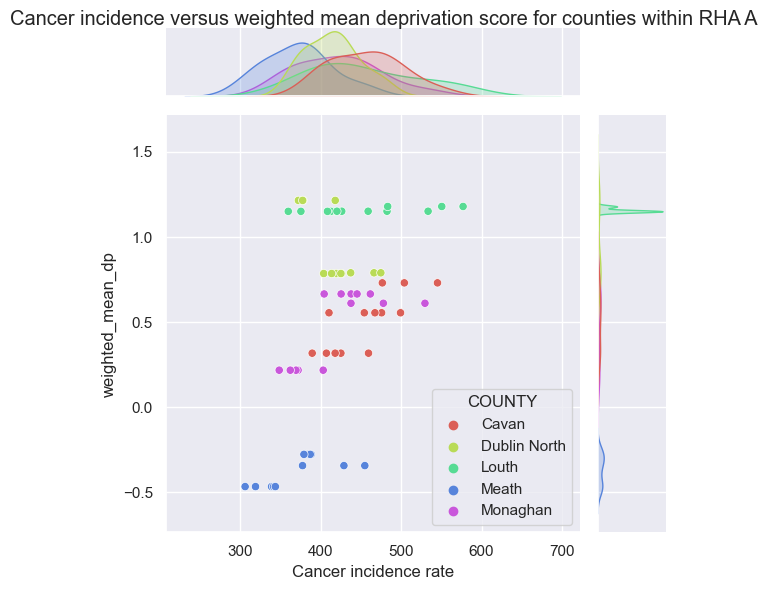

In [51]:
p = sns.jointplot(data=RHA_dp_deaths_cancer, x='Cancer incidence rate', y='weighted_mean_dp', hue = 'COUNTY', palette='hls')
p.fig.suptitle("Cancer incidence versus weighted mean deprivation score for counties within RHA A")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)
plt.show()

Merging of both RHA A and other RHA cancer incidence dataset to deprivation

In [33]:
national_comparison =RHA_total.merge(dp_RHA, left_on=['Regional Health Area', 'Year'], right_on=['Regional Health Area', 'Year'], how = 'outer')
national_comparison.head()

,Regional Health Area,Year,Case numbers,weighted_mean_dp
0,Other RHA,2006,13286,0.451345
1,Other RHA,2007,14225,NaN
2,Other RHA,2008,14940,NaN
3,Other RHA,2009,15553,NaN
4,Other RHA,2010,15858,NaN


In [34]:
national_comparison = national_comparison.merge(population, left_on=['Regional Health Area', 'Year'], right_on=['Regional Health Area', 'Year'], how = 'outer')
national_comparison.head()

,Regional Health Area,Year,Case numbers,weighted_mean_dp,Population
0,Other RHA,2006,13286,0.451345,3311229.0
1,Other RHA,2007,14225,NaN,NaN
2,Other RHA,2008,14940,NaN,NaN
3,Other RHA,2009,15553,NaN,NaN
4,Other RHA,2010,15858,NaN,NaN


In [35]:
national_data = national_comparison.fillna(method='ffill')
national_data.head()

,Regional Health Area,Year,Case numbers,weighted_mean_dp,Population
0,Other RHA,2006,13286,0.451345,3311229.0
1,Other RHA,2007,14225,0.451345,3311229.0
2,Other RHA,2008,14940,0.451345,3311229.0
3,Other RHA,2009,15553,0.451345,3311229.0
4,Other RHA,2010,15858,0.451345,3311229.0


In [36]:
national_data['cancer incidence rate'] = (national_data['Case numbers'] / national_data['Population'])*100000
national_data.head(40)

,Regional Health Area,Year,Case numbers,weighted_mean_dp,Population,cancer incidence rate
0,Other RHA,2006,13286,0.451345,3311229.0,401.240748
1,Other RHA,2007,14225,0.451345,3311229.0,429.598799
2,Other RHA,2008,14940,0.451345,3311229.0,451.191989
3,Other RHA,2009,15553,0.451345,3311229.0,469.704753
4,Other RHA,2010,15858,0.451345,3311229.0,478.915835
5,Other RHA,2011,16600,0.392826,3566068.0,465.498695
6,Other RHA,2012,16514,0.392826,3566068.0,463.087075
7,Other RHA,2013,16830,0.392826,3566068.0,471.948376
8,Other RHA,2014,17244,0.392826,3566068.0,483.557801
9,Other RHA,2015,17580,0.392826,3566068.0,492.979943


In [37]:
national_compare = national_data["Regional Health Area"].isin(["RHA A", "Other RHA"])
national_compare = national_data[national_compare]
national_compare.head(20)

,Regional Health Area,Year,Case numbers,weighted_mean_dp,Population,cancer incidence rate
0,Other RHA,2006,13286,0.451345,3311229.0,401.240748
1,Other RHA,2007,14225,0.451345,3311229.0,429.598799
2,Other RHA,2008,14940,0.451345,3311229.0,451.191989
3,Other RHA,2009,15553,0.451345,3311229.0,469.704753
4,Other RHA,2010,15858,0.451345,3311229.0,478.915835
5,Other RHA,2011,16600,0.392826,3566068.0,465.498695
6,Other RHA,2012,16514,0.392826,3566068.0,463.087075
7,Other RHA,2013,16830,0.392826,3566068.0,471.948376
8,Other RHA,2014,17244,0.392826,3566068.0,483.557801
9,Other RHA,2015,17580,0.392826,3566068.0,492.979943


Getting 2 datasets to compare within RHA A and outside it and the National picture

In [38]:
Ireland = national_compare.groupby('Year').sum().reset_index()
Ireland.head()

,Year,Case numbers,weighted_mean_dp,Population,cancer incidence rate
0,2006,16692,1.242043,4239848.0,768.021957
1,2007,17800,1.242043,4239848.0,814.579076
2,2008,18582,1.242043,4239848.0,843.387282
3,2009,19342,1.242043,4239848.0,877.730004
4,2010,19922,1.242043,4239848.0,916.554952


In [39]:
Ireland = Ireland.drop(["weighted_mean_dp", "cancer incidence rate"], axis=1)

In [40]:
Ireland['Cancer incidence rate'] = (Ireland['Case numbers'] / Ireland['Population'])*100000

Visualisation of RHA A versus the rest of the Country and the National Picture

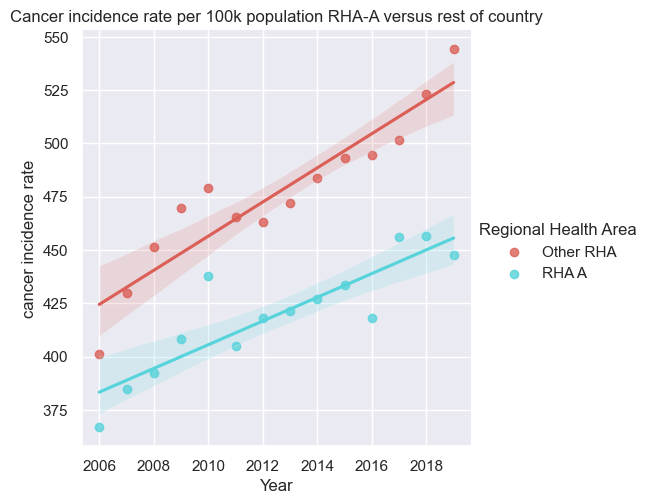

In [52]:
sns.lmplot(data=national_compare, x='Year', y='cancer incidence rate', hue = 'Regional Health Area', palette='hls')
plt.title('Cancer incidence rate per 100k population RHA-A versus rest of country')
plt.show()

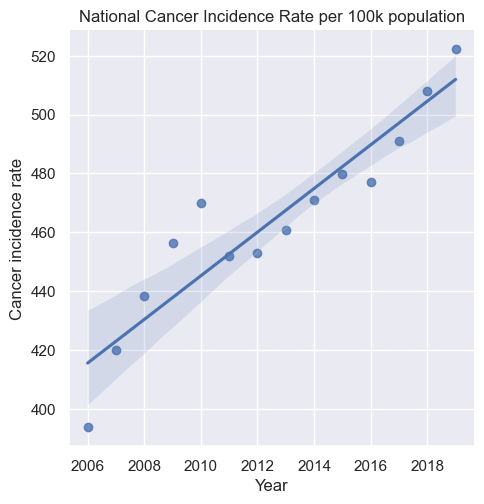

In [53]:
sns.lmplot(data=Ireland, x='Year', y='Cancer incidence rate', palette='hls')
plt.title('National Cancer Incidence Rate per 100k population')
plt.show()

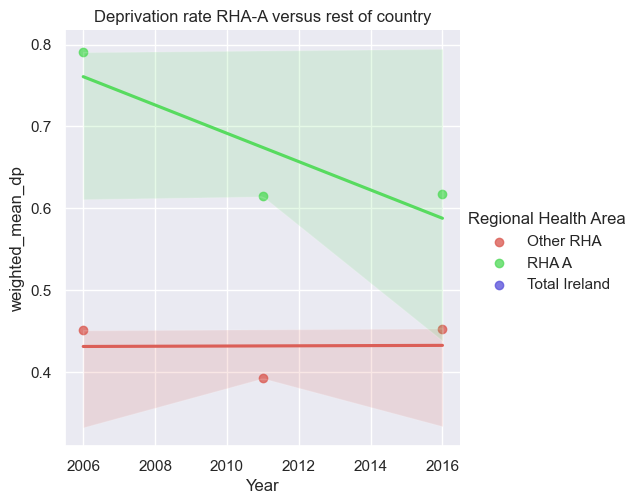

In [54]:
sns.lmplot(data=national_comparison, x='Year', y='weighted_mean_dp', hue = 'Regional Health Area', palette='hls')
plt.title('Deprivation rate RHA-A versus rest of country')
plt.show()

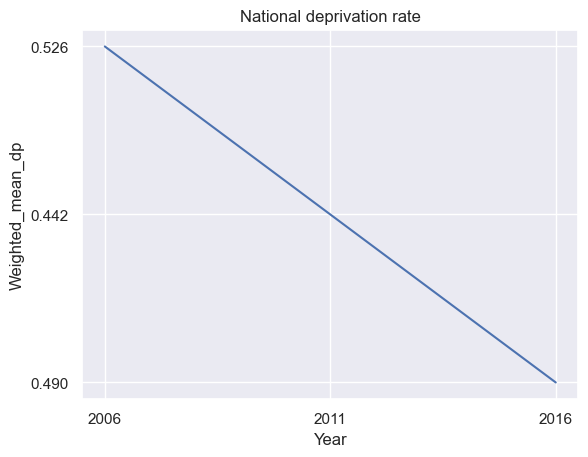

In [55]:
sns.lineplot(data=dp_ireland, x='Year', y='Weighted_mean_dp', palette='hls')
plt.title('National deprivation rate')
plt.show()